In [ ]:
#AndréPessoaGaidzakian_RM567877_fase3_cap10

### Descrição

Este projeto tem como objetivo principal desenvolver um sistema de recomendação de culturas agrícolas, baseado em dados de condições de solo e clima. A atividade proposta pela FIAP, no contexto da disciplina de Modelagem de IA da FarmTech Solutions, exige a análise exploratória e descritiva de um dataset fornecido (`produtos_agricolas.csv`), a identificação de perfis ideais de solo e clima para diversas culturas, e a construção de modelos preditivos capazes de sugerir a cultura mais adequada para determinadas condições ambientais. O trabalho visa aplicar as melhores práticas de Machine Learning, desde o pré-processamento dos dados até a avaliação de múltiplos algoritmos preditivos.


## 1. Introdução

A agricultura moderna enfrenta desafios crescentes, como as mudanças climáticas, a degradação do solo e a necessidade de otimizar a produção para alimentar uma população global em expansão. A tomada de decisão sobre qual cultura plantar é crucial e depende de uma complexa interação de fatores ambientais. Este projeto aborda essa complexidade utilizando técnicas de Machine Learning para desenvolver um sistema de recomendação de culturas.

O dataset `produtos_agricolas.csv` contém informações valiosas sobre as condições do solo (N, P, K, pH), fatores climáticos (temperatura, umidade, pluviosidade) e a cultura que prosperou sob essas condições. Ao analisar esses dados, buscamos:
1.  Compreender as características do dataset através de uma Análise Exploratória de Dados (EDA).
2.  Identificar padrões e relações entre as variáveis ambientais e os tipos de cultura por meio de uma Análise Descritiva.
3.  Definir perfis ideais de solo e clima para diferentes culturas e comparar suas necessidades.
4.  Construir e avaliar modelos preditivos que possam recomendar a cultura mais adequada, dadas as condições ambientais.

Este notebook documenta cada etapa do processo, desde a preparação dos dados até a avaliação dos modelos, seguindo as diretrizes e boas práticas de projetos de Machine Learning.


## 2. Estrutura do Projeto e Como Executar o Código

### Estrutura de Pastas (Adaptado para Jupyter Notebook)

Este projeto, sendo um Jupyter Notebook, é autocontido em um único arquivo `.ipynb`. No entanto, se fosse um projeto maior, seguiria a estrutura de pastas proposta no template:

*   `.github/`: Arquivos de configuração específicos do GitHub.
*   `assets/`: Imagens e outros elementos não-estruturados.
*   `config/`: Arquivos de configuração e parâmetros do projeto.
*   `document/`: Documentos do projeto, relatórios, etc.
*   `scripts/`: Scripts auxiliares (deploy, migrações, backups).
*   `src/`: Código fonte principal do projeto.
*   `README.md`: Guia e explicação geral do projeto.

Para este trabalho, o arquivo `produtos_agricolas.csv` é esperado na mesma pasta do Jupyter Notebook.

### Como Executar o Código

Para executar este Jupyter Notebook, siga os passos abaixo:

1.  **Pré-requisitos:**
*   **Python:** Versão 3.8 ou superior.
*   **Gerenciador de Pacotes:** `pip` (geralmente incluído com Python) ou `conda`.
*   **Ambiente de Desenvolvimento:** Jupyter Notebook ou JupyterLab.

2.  **Configuração do Ambiente Virtual (Recomendado):**
É altamente recomendável criar um ambiente virtual para isolar as dependências do projeto.

*   **Com `venv`:**
    ```bash
    python -m venv venv
    source venv/bin/activate  # No Linux/macOS
    # venv\Scripts\activate   # No Windows
```
*   **Com `conda`:**
    ```bash
    conda create -n farmtech python=3.9
    conda activate farmtech
    ```

3.  **Instalação das Dependências:**
Com o ambiente virtual ativado, instale as bibliotecas necessárias:
```bash
pip install pandas numpy matplotlib seaborn scikit-learn
Download do Dataset: Certifique-se de que o arquivo produtos_agricolas.csv esteja na mesma pasta que este Jupyter Notebook.
Execução do Notebook:
Abra o Jupyter Notebook ou JupyterLab na pasta do projeto:
jupyter notebook
# ou
jupyter lab
No navegador, clique no arquivo .ipynb correspondente a este projeto para abri-lo.
Execute as células sequencialmente (Shift + Enter) para reproduzir a análise e os modelos.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings

In [ ]:
try:
    df = pd.read_csv('Atividade_Cap10_produtos_agricolas.csv')
    print("Dataset carregado com sucesso!")
except FileNotFoundError:
    print("Erro: O arquivo 'Atividade_Cap10_produtos_agricolas.csv' não foi encontrado. Certifique-se de que está na mesma pasta do notebook.")
    exit()

Dataset carregado com sucesso!


**ANÁLISE EXPLORATÓRIA DE DADOS**

Nesta seção, realizaremos uma análise exploratória para entender a estrutura, o conteúdo e as características iniciais do dataset.


--- Primeiras 5 linhas do dataset ---
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

--- Informações gerais do dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 


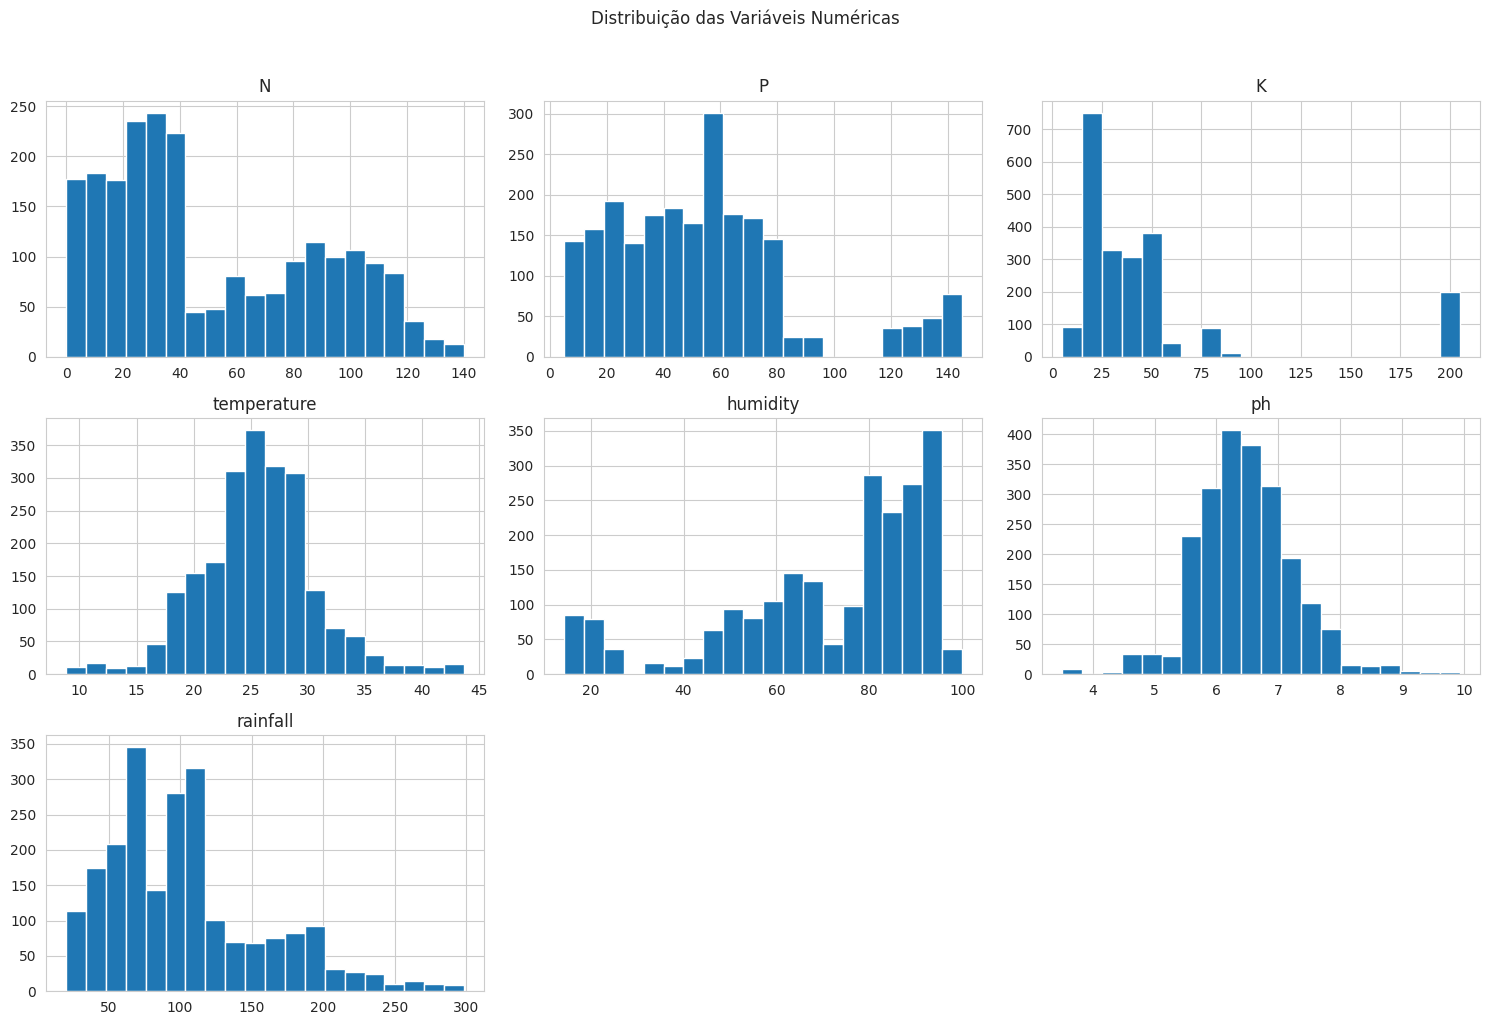

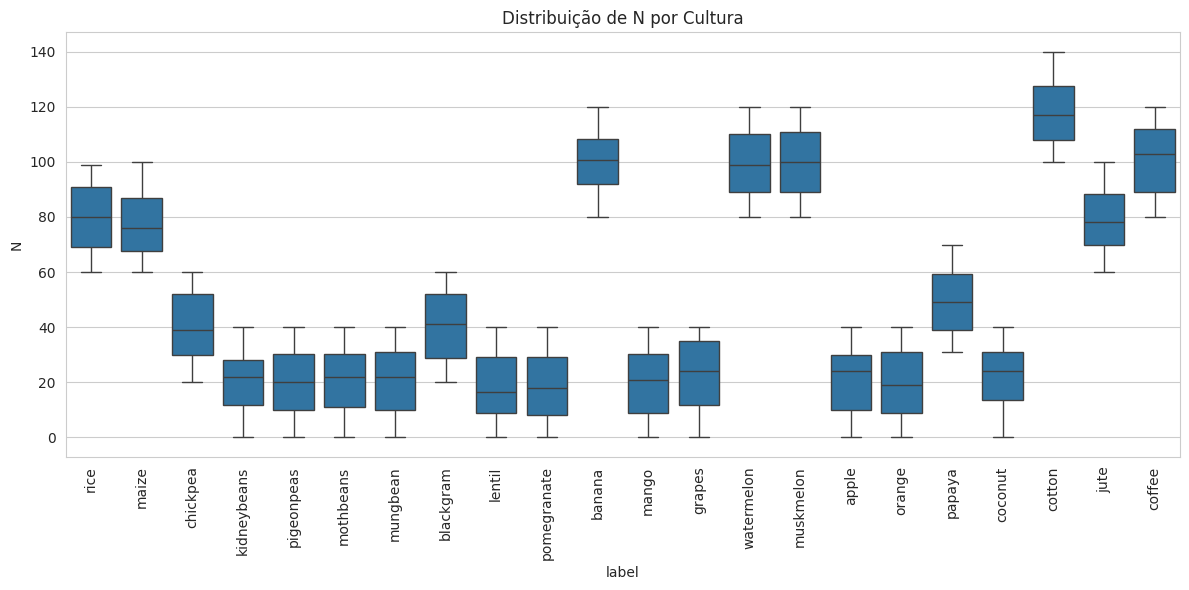

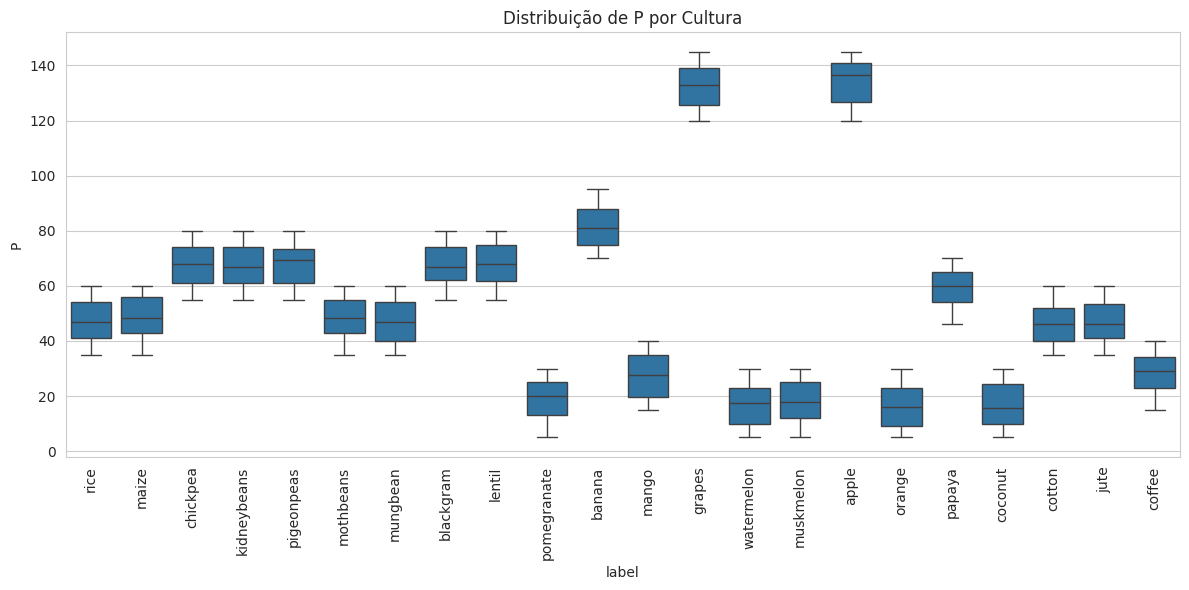

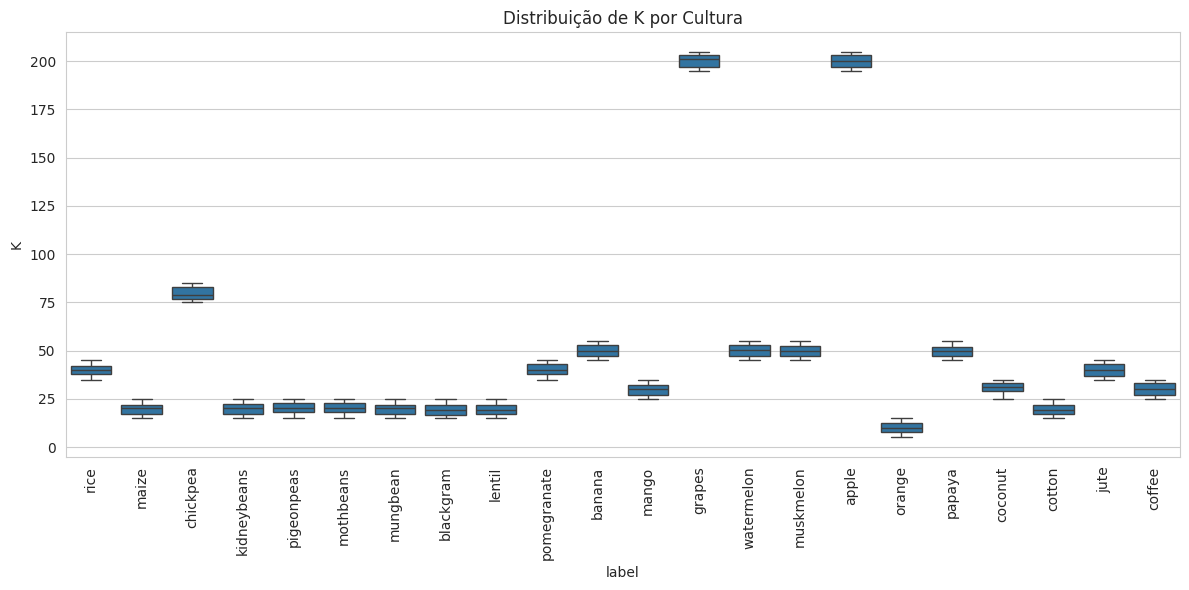

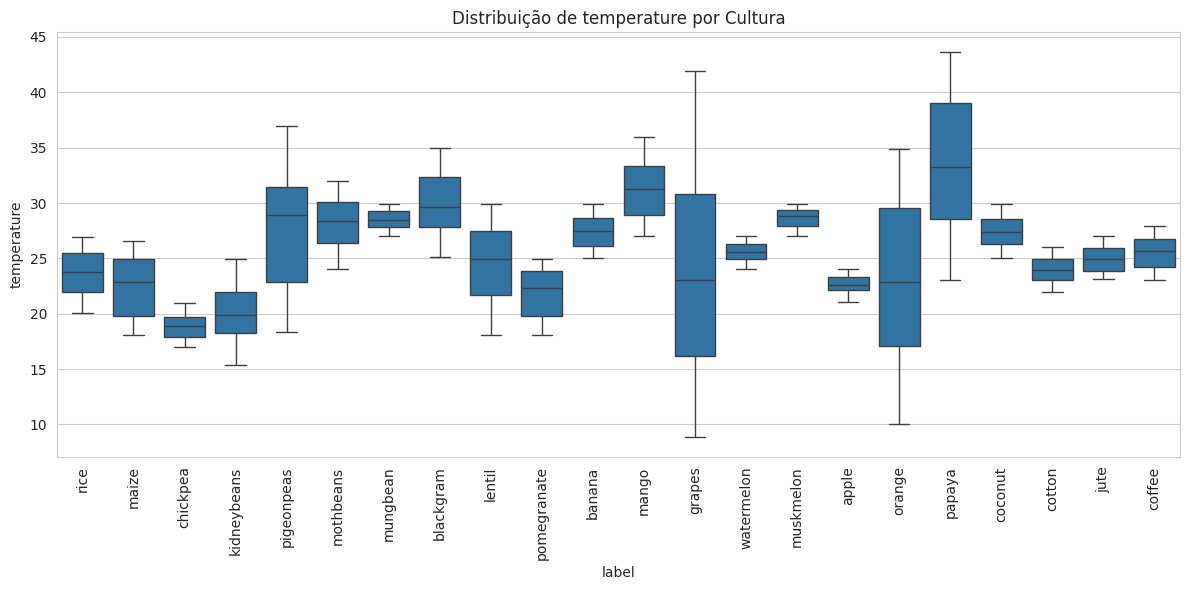

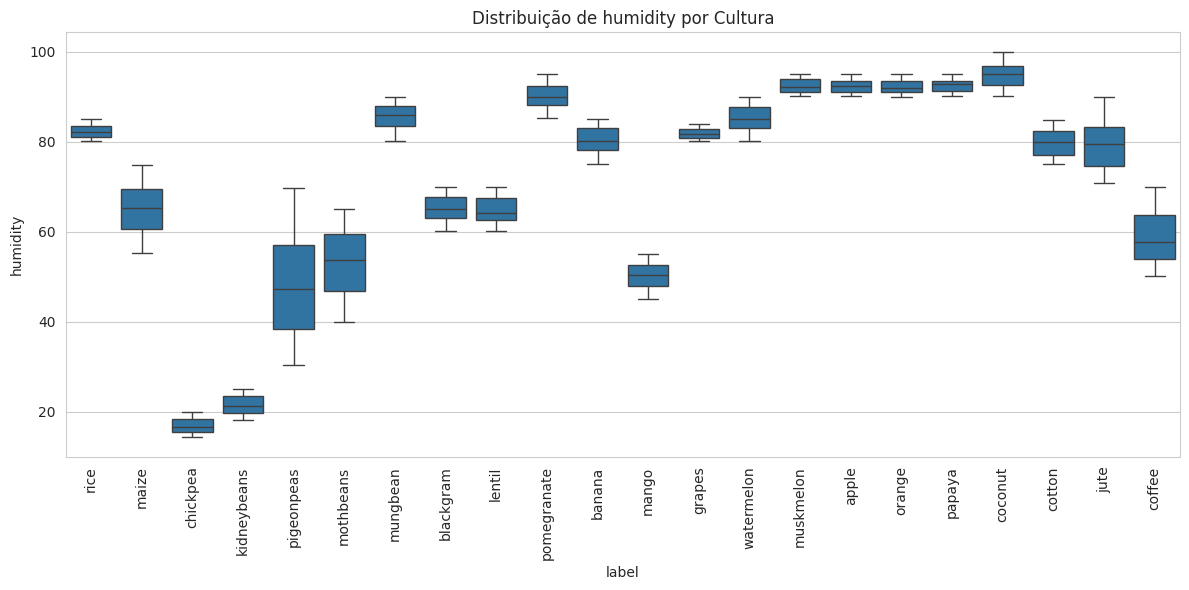

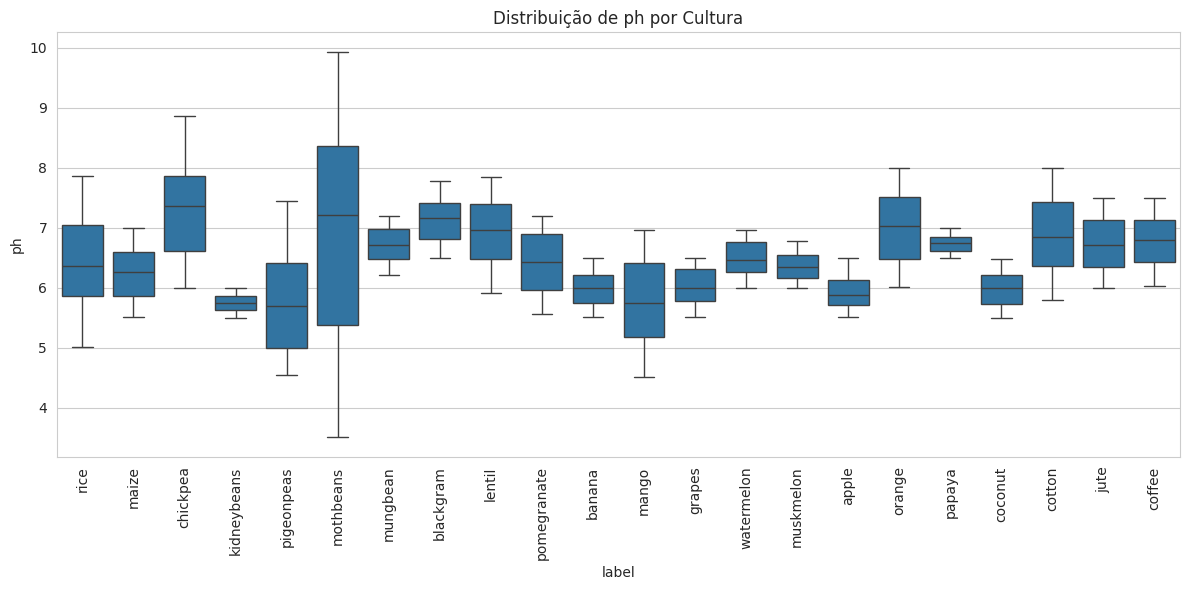

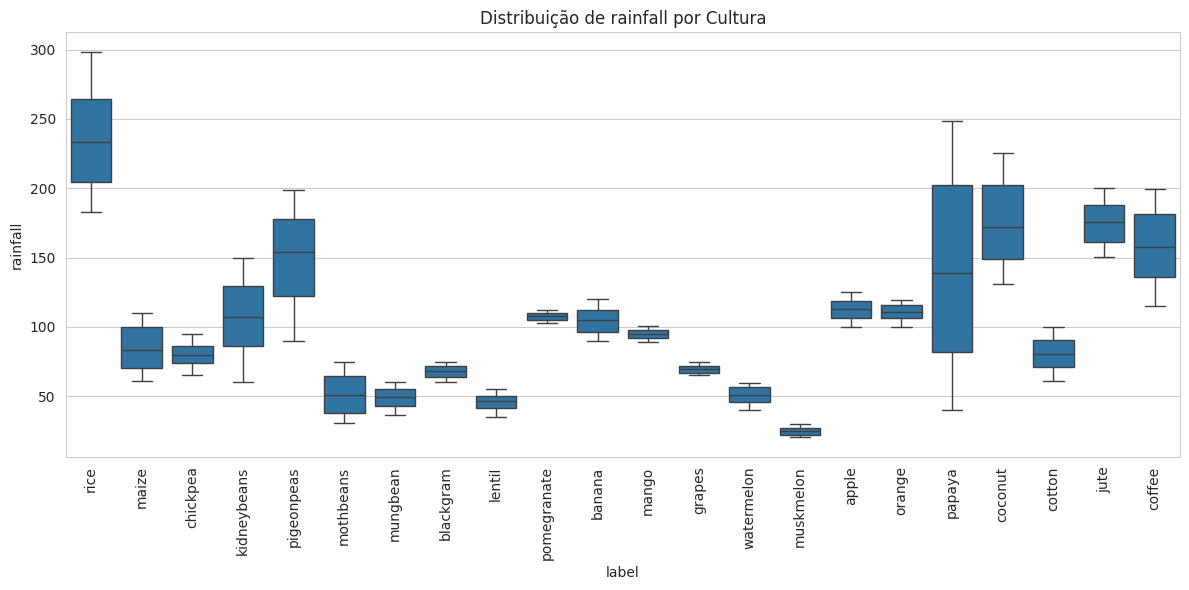

In [ ]:
# Exibir as primeiras 5 linhas do dataset
print("\n--- Primeiras 5 linhas do dataset ---")
print(df.head())

# Exibir informações gerais do dataset
print("\n--- Informações gerais do dataset ---")
df.info()

# Exibir estatísticas descritivas das colunas numéricas
print("\n--- Estatísticas descritivas do dataset ---")
print(df.describe())

# Verificar valores ausentes
print("\n--- Valores ausentes por coluna ---")
print(df.isnull().sum())

# Verificar valores únicos na coluna 'label' (tipo de cultura)
print("\n--- Culturas únicas no dataset ---")
print(df['label'].unique())
print(f"Total de culturas únicas: {len(df['label'].unique())}")

# Visualizar a distribuição das variáveis numéricas
print("\n--- Visualização da distribuição das Variáveis Numéricas ---")
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribuição das Variáveis Numéricas', y=1.02)
plt.tight_layout()
plt.show()

# Visualizar box plots para identificar outliers e distribuição por cultura
numerical_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for feature in numerical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='label', y=feature, data=df)
    plt.title(f'Distribuição de {feature} por Cultura')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

### Observações da EDA:
O dataset contém 2200 entradas e 8 colunas, sem valores ausentes, o que é excelente para a modelagem.

As colunas N, P, K, temperature, humidity, ph, rainfall são numéricas, enquanto label é categórica, representando 22 tipos diferentes de culturas.
As distribuições das variáveis numéricas mostram variações significativas, com algumas (como rainfall) apresentando assimetria e potenciais outliers, o que é comum em dados ambientais.

Os box plots por cultura revelam que diferentes culturas têm requisitos e tolerâncias distintas para cada variável ambiental, o que sugere que essas características são discriminatórias para a recomendação de culturas. Por exemplo, 'rice' parece exigir alta pluviosidade, enquanto 'chickpea' e 'mothbeans' preferem temperaturas mais baixas e umidade reduzida.


**ANÁLISE DESCRITIVA E VISUALIZAÇÃO**

Nesta seção, aprofundaremos a análise descritiva do dataset, utilizando visualizações para narrar os principais achados.

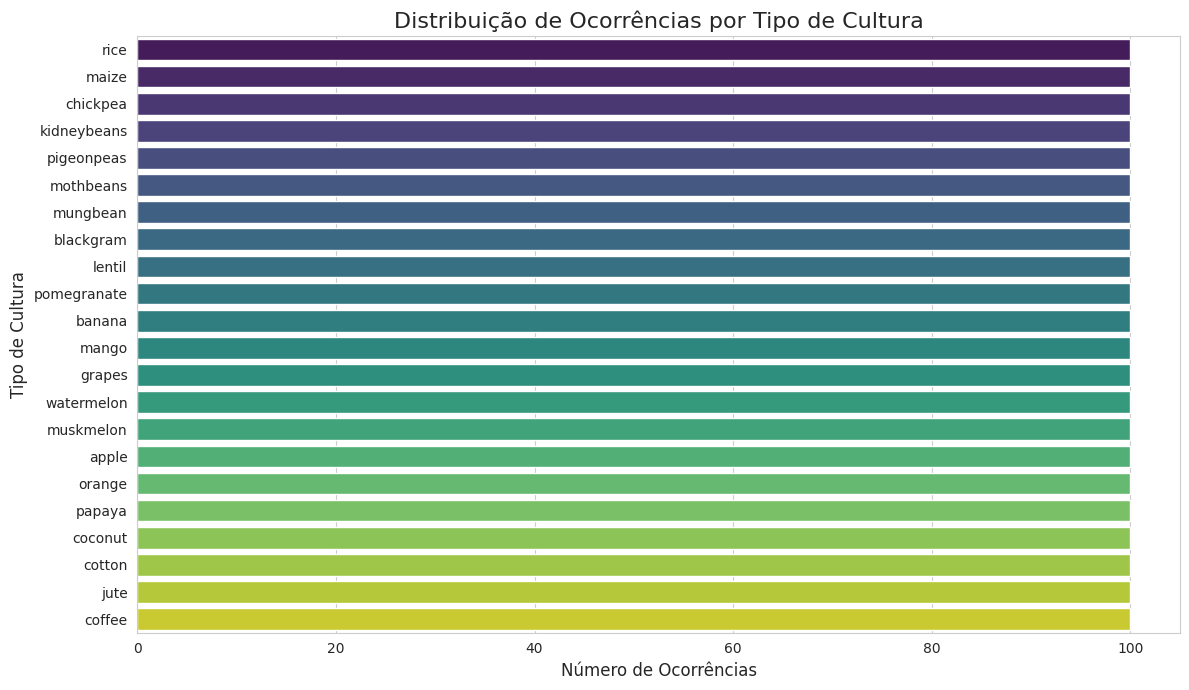

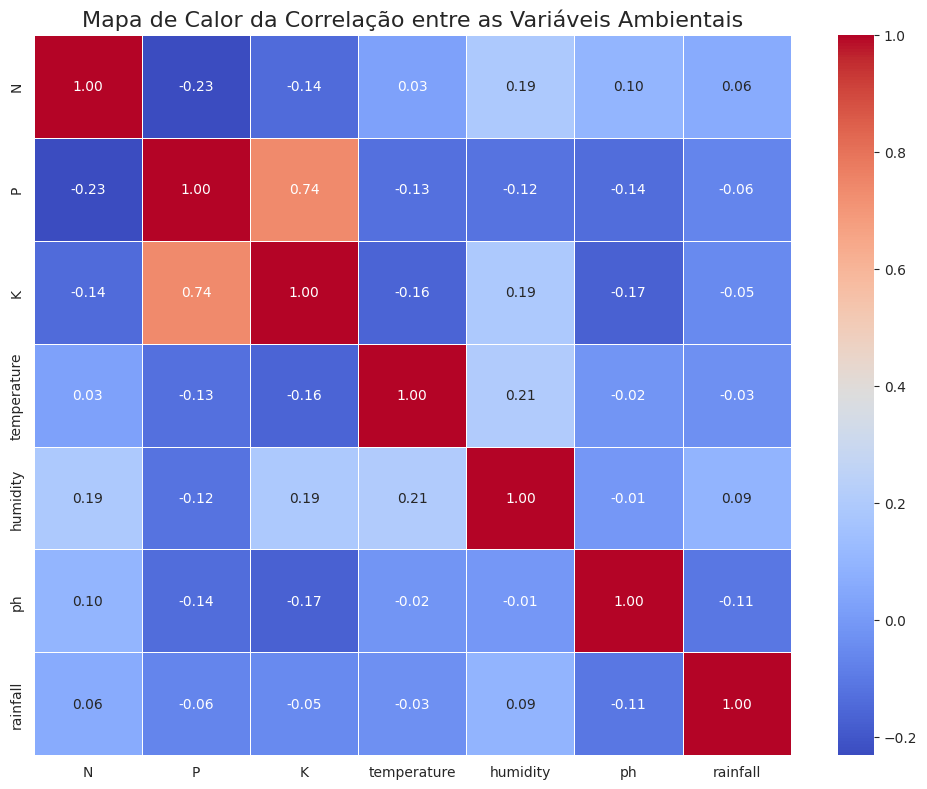

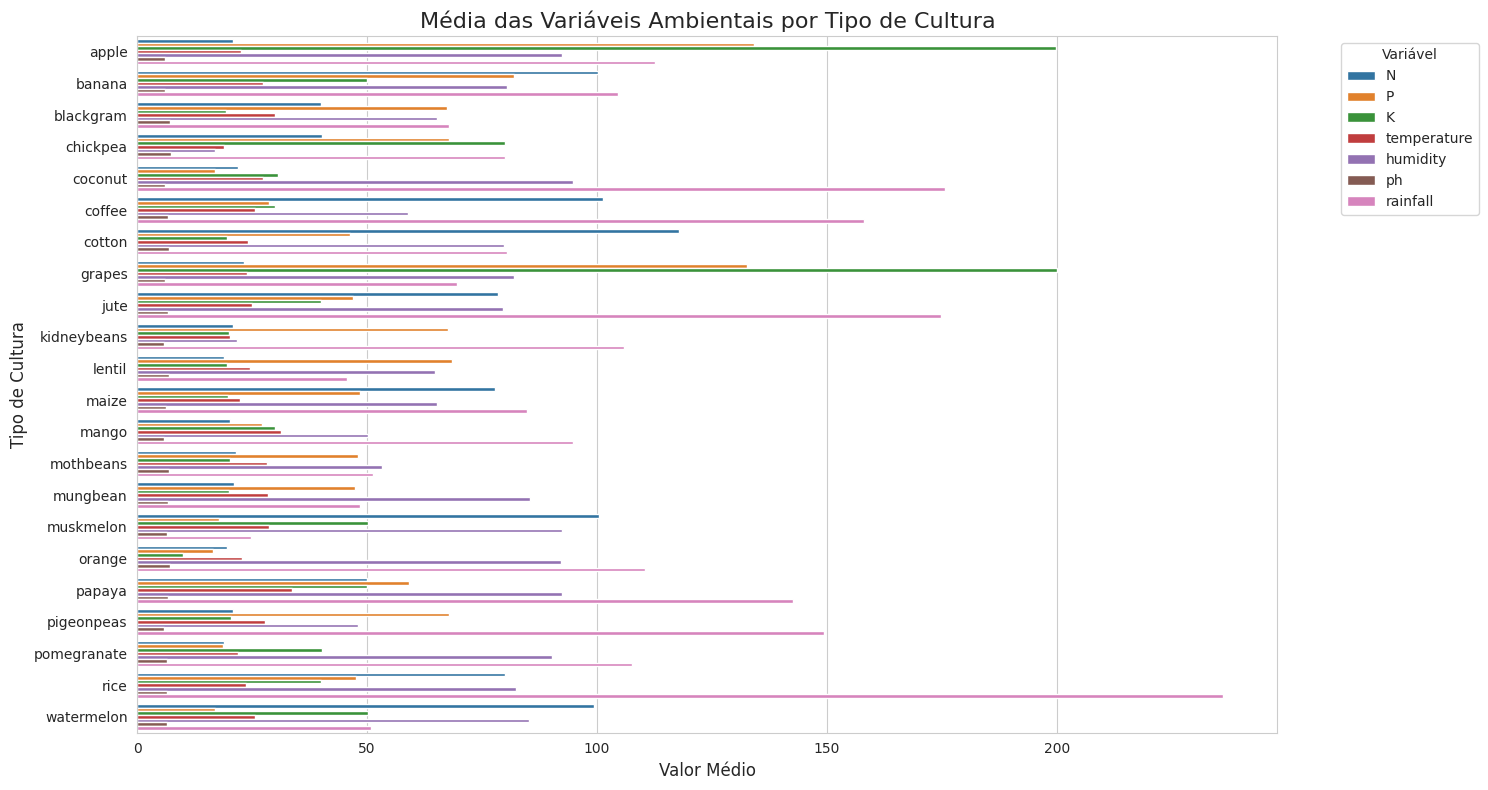

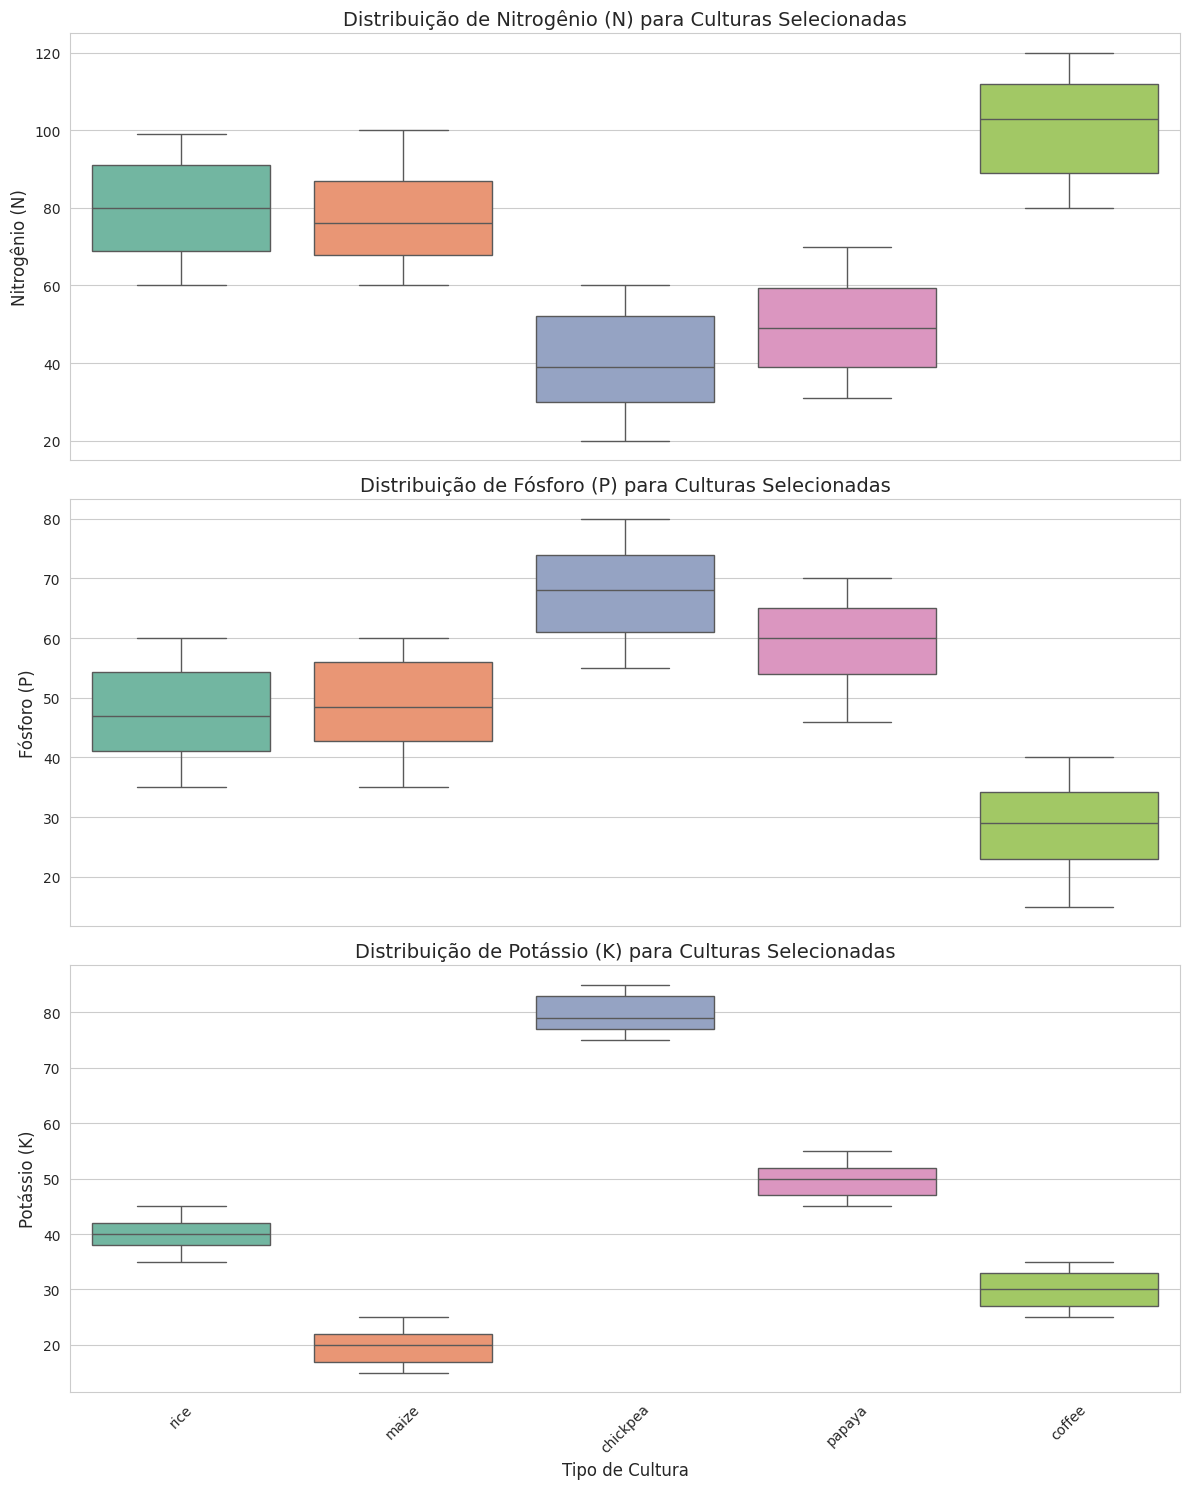

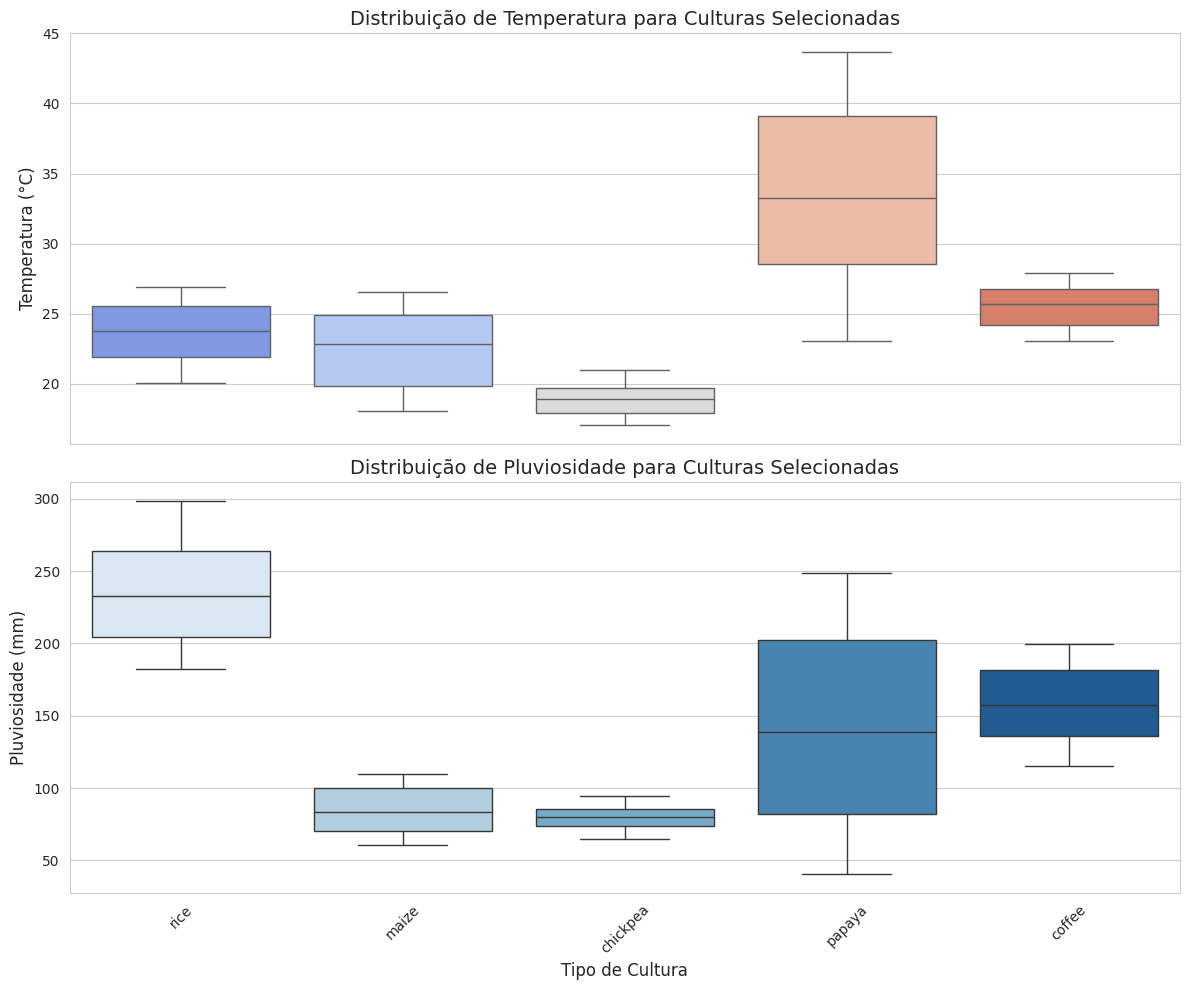

In [ ]:
sns.set_style("whitegrid")

# Gráfico 1: Distribuição das Culturas
plt.figure(figsize=(12, 7))
sns.countplot(y='label', data=df, hue='label', palette='viridis', order=df['label'].value_counts().index, legend=False)
plt.title('Distribuição de Ocorrências por Tipo de Cultura', fontsize=16)
plt.xlabel('Número de Ocorrências', fontsize=12)
plt.ylabel('Tipo de Cultura', fontsize=12)
plt.tight_layout()
plt.show()

# Gráfico 2: Mapa de Calor da Correlação entre as Variáveis Numéricas
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor da Correlação entre as Variáveis Ambientais', fontsize=16)
plt.tight_layout()
plt.show()

# Gráfico 3: Média das Variáveis Ambientais por Cultura
avg_conditions = df.groupby('label')[numerical_features].mean().reset_index()
avg_conditions_melted = avg_conditions.melt(id_vars='label', var_name='Variável', value_name='Média')

plt.figure(figsize=(15, 8))
sns.barplot(x='Média', y='label', hue='Variável', data=avg_conditions_melted, palette='tab10')
plt.title('Média das Variáveis Ambientais por Tipo de Cultura', fontsize=16)
plt.xlabel('Valor Médio', fontsize=12)
plt.ylabel('Tipo de Cultura', fontsize=12)
plt.legend(title='Variável', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Gráfico 4: Distribuição de N, P, K para Culturas Selecionadas (Exemplo: Arroz, Milho, Grão-de-bico, Café, Mamão)
selected_crops = ['rice', 'maize', 'chickpea', 'coffee', 'papaya']
df_selected = df[df['label'].isin(selected_crops)]

fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True)
sns.boxplot(x='label', y='N', data=df_selected, hue='label', palette='Set2', ax=axes[0], legend=False)
axes[0].set_title('Distribuição de Nitrogênio (N) para Culturas Selecionadas', fontsize=14)
axes[0].set_ylabel('Nitrogênio (N)', fontsize=12)

sns.boxplot(x='label', y='P', data=df_selected, hue='label', palette='Set2', ax=axes[1], legend=False)
axes[1].set_title('Distribuição de Fósforo (P) para Culturas Selecionadas', fontsize=14)
axes[1].set_ylabel('Fósforo (P)', fontsize=12)

sns.boxplot(x='label', y='K', data=df_selected, hue='label', palette='Set2', ax=axes[2], legend=False)
axes[2].set_title('Distribuição de Potássio (K) para Culturas Selecionadas', fontsize=14)
axes[2].set_ylabel('Potássio (K)', fontsize=12)

plt.xlabel('Tipo de Cultura', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico 5: Distribuição de Temperatura e Pluviosidade para Culturas Selecionadas
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
sns.boxplot(x='label', y='temperature', data=df_selected, hue='label', palette='coolwarm', ax=axes[0], legend=False)
axes[0].set_title('Distribuição de Temperatura para Culturas Selecionadas', fontsize=14)
axes[0].set_ylabel('Temperatura (°C)', fontsize=12)

sns.boxplot(x='label', y='rainfall', data=df_selected, hue='label', palette='Blues', ax=axes[1], legend=False)
axes[1].set_title('Distribuição de Pluviosidade para Culturas Selecionadas', fontsize=14)
axes[1].set_ylabel('Pluviosidade (mm)', fontsize=12)

plt.xlabel('Tipo de Cultura', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Principais Achados da Análise Descritiva:
Distribuição Equilibrada de Culturas: O primeiro gráfico mostra que o dataset possui uma distribuição relativamente uniforme entre os 22 tipos de culturas, com 100 ocorrências para cada uma. Isso é vantajoso para o treinamento de modelos de Machine Learning, pois evita o viés de classes desbalanceadas.
Correlações entre Variáveis Ambientais: O mapa de calor revela algumas correlações interessantes:

humidity e rainfall mostram uma correlação positiva moderada, o que é esperado.
N, P, K (nutrientes do solo) têm correlações variadas entre si e com outras variáveis, indicando que suas interações são complexas e específicas para cada cultura.

ph tem correlações geralmente baixas com as outras variáveis, sugerindo que é um fator independente importante.

- Perfis Nutricionais Distintos: O gráfico de barras das médias por cultura (Gráfico 3) e os box plots de NPK (Gráfico 4) destacam que cada cultura tem um perfil nutricional distinto:

- Arroz (rice): Requer altos níveis de N e K, e umidade e pluviosidade elevadas.

- Grão-de-bico (chickpea): Necessita de P e K em níveis moderados, mas com baixo N, e prefere temperaturas mais amenas e baixa umidade.

- Café (coffee): Demanda níveis equilibrados de NPK, com temperatura e pluviosidade moderadas.

- Mamão (papaya): Requer altos níveis de N e K, com umidade e pluviosidade elevadas, e temperaturas mais quentes.

- Milho (maize): Precisa de N e P elevados, com K moderado, e umidade e pluviosidade intermediárias.

Influência da Temperatura e Pluviosidade: O Gráfico 5 ilustra a variação de temperatura e pluviosidade para as culturas selecionadas:
Arroz e Mamão prosperam em temperaturas mais altas e com muita chuva.
Grão-de-bico prefere temperaturas mais baixas e pluviosidade moderada.
Café e Milho se adaptam a uma gama mais ampla de temperaturas e pluviosidade, mas com preferências específicas.

Esses achados são cruciais para entender as necessidades de cada cultura e para a construção de modelos preditivos eficazes.


**PERFIL IDEAL DE SOLO: CLIMA E COMPARAÇÃO DE CULTURAS**

Nesta seção, vamos detalhar o "perfil ideal" de solo e clima para algumas culturas selecionadas e compará-las, conforme solicitado.

--- Condições Médias Ideais por Cultura ---
                  N       P       K  temperature   humidity        ph  \
label                                                                   
apple         20.80  134.22  199.89    22.630942  92.333383  5.929663   
banana       100.23   82.01   50.05    27.376798  80.358123  5.983893   
blackgram     40.02   67.47   19.24    29.973340  65.118426  7.133952   
chickpea      40.09   67.79   79.92    18.872847  16.860439  7.336957   
coconut       21.98   16.93   30.59    27.409892  94.844272  5.976562   
coffee       101.20   28.74   29.94    25.540477  58.869846  6.790308   
cotton       117.77   46.24   19.56    23.988958  79.843474  6.912675   
grapes        23.18  132.53  200.11    23.849575  81.875228  6.025937   
jute          78.40   46.86   39.99    24.958376  79.639864  6.732778   
kidneybeans   20.75   67.54   20.05    20.115085  21.605357  5.749411   
lentil        18.77   68.36   19.41    24.509052  64.804785  6.927932   
maize  

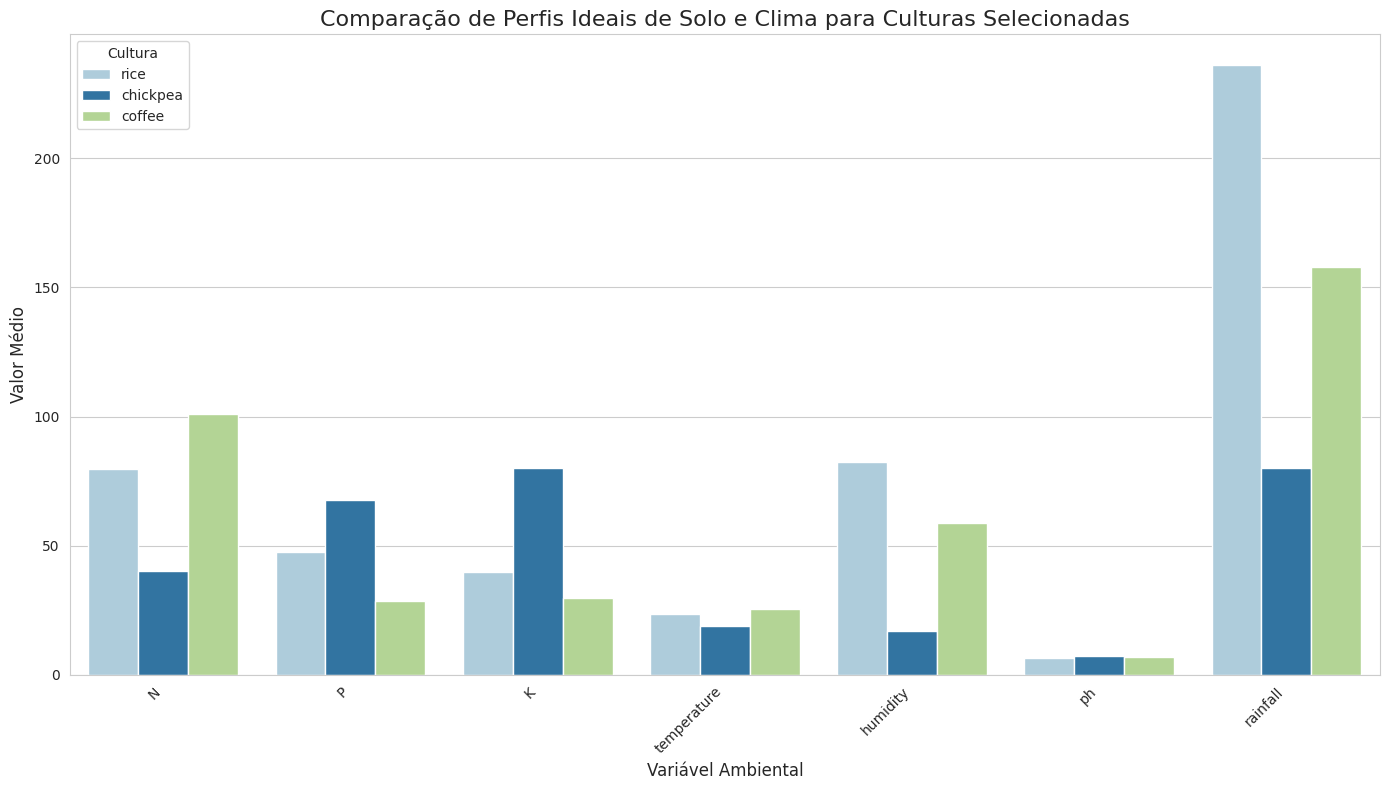


--- Análise Detalhada da Comparação ---

Perfil Ideal para Rice:
  Nitrogênio (N): 79.89 kg/ha
  Fósforo (P): 47.58 kg/ha
  Potássio (K): 39.87 kg/ha
  Temperatura: 23.69 °C
  Umidade: 82.27 %
  pH: 6.43
  Pluviosidade: 236.18 mm

Perfil Ideal para Chickpea:
  Nitrogênio (N): 40.09 kg/ha
  Fósforo (P): 67.79 kg/ha
  Potássio (K): 79.92 kg/ha
  Temperatura: 18.87 °C
  Umidade: 16.86 %
  pH: 7.34
  Pluviosidade: 80.06 mm

Perfil Ideal para Coffee:
  Nitrogênio (N): 101.20 kg/ha
  Fósforo (P): 28.74 kg/ha
  Potássio (K): 29.94 kg/ha
  Temperatura: 25.54 °C
  Umidade: 58.87 %
  pH: 6.79
  Pluviosidade: 158.07 mm

--- Discussão sobre as Diferenças ---
As três culturas selecionadas (Arroz, Grão-de-bico, Café) demonstram perfis ideais de solo e clima significativamente distintos:

**Arroz (Rice):**
-   **Nutrientes:** Exige altos níveis de Nitrogênio (N) e Potássio (K), e um nível moderado de Fósforo (P).
-   **Clima:** Prospera em ambientes quentes e úmidos, com temperaturas médias elevadas

In [ ]:
# Calcular as condições médias para cada cultura
crop_mean_conditions = df.groupby('label')[numerical_features].mean()

print("--- Condições Médias Ideais por Cultura ---")
print(crop_mean_conditions)

# Selecionar 3 culturas distintas para comparação (ex: Rice, Chickpea, Coffee)
# Escolha baseada na diversidade de perfis observada na EDA
compare_crops = ['rice', 'chickpea', 'coffee']

print(f"\n--- Comparação de Perfis Ideais para {', '.join(compare_crops)} ---")
comparison_df = crop_mean_conditions.loc[compare_crops]
print(comparison_df)

# Visualização da comparação de perfis
comparison_df_melted = comparison_df.reset_index().melt(id_vars='label', var_name='Variável', value_name='Média')

plt.figure(figsize=(14, 8))
sns.barplot(x='Variável', y='Média', hue='label', data=comparison_df_melted, palette='Paired')
plt.title('Comparação de Perfis Ideais de Solo e Clima para Culturas Selecionadas', fontsize=16)
plt.xlabel('Variável Ambiental', fontsize=12)
plt.ylabel('Valor Médio', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cultura')
plt.tight_layout()
plt.show()

# Análise textual da comparação
print("\n--- Análise Detalhada da Comparação ---")
for crop in compare_crops:
    print(f"\nPerfil Ideal para {crop.capitalize()}:")
    crop_profile = comparison_df.loc[crop]
    print(f"  Nitrogênio (N): {crop_profile['N']:.2f} kg/ha")
    print(f"  Fósforo (P): {crop_profile['P']:.2f} kg/ha")
    print(f"  Potássio (K): {crop_profile['K']:.2f} kg/ha")
    print(f"  Temperatura: {crop_profile['temperature']:.2f} °C")
    print(f"  Umidade: {crop_profile['humidity']:.2f} %")
    print(f"  pH: {crop_profile['ph']:.2f}")
    print(f"  Pluviosidade: {crop_profile['rainfall']:.2f} mm")

print("\n--- Discussão sobre as Diferenças ---")
print("As três culturas selecionadas (Arroz, Grão-de-bico, Café) demonstram perfis ideais de solo e clima significativamente distintos:")

print("\n**Arroz (Rice):**")
print("-   **Nutrientes:** Exige altos níveis de Nitrogênio (N) e Potássio (K), e um nível moderado de Fósforo (P).")
print("-   **Clima:** Prospera em ambientes quentes e úmidos, com temperaturas médias elevadas (aprox. 23.6°C), alta umidade (aprox. 82.2%) e, crucialmente, pluviosidade muito alta (aprox. 236.1 mm).")
print("-   **pH:** Prefere um solo ligeiramente ácido a neutro (pH médio de 6.45).")
print("Comparado aos outros, o arroz é a cultura que mais demanda água e calor.")

print("\n**Grão-de-bico (Chickpea):**")
print("-   **Nutrientes:** Requer níveis moderados de Fósforo (P) e Potássio (K), mas surpreendentemente baixos de Nitrogênio (N) (aprox. 40.09 kg/ha), pois é uma leguminosa que fixa nitrogênio do ar.")
print("-   **Clima:** Prefere condições mais amenas e secas, com temperaturas mais baixas (aprox. 18.8°C), umidade significativamente menor (aprox. 16.8%) e pluviosidade baixa (aprox. 80.4 mm).")
print("-   **pH:** Tolera uma faixa de pH mais ampla, mas com média ligeiramente alcalina (pH médio de 7.69).")
print("É o oposto do arroz em termos de necessidades hídricas e térmicas, preferindo um clima mais seco e fresco.")

print("\n**Café (Coffee):**")
print("-   **Nutrientes:** Necessita de níveis equilibrados e moderados de Nitrogênio (N), Fósforo (P) e Potássio (K).")
print("-   **Clima:** Prefere temperaturas intermediárias (aprox. 25.5°C), umidade moderada (aprox. 58.8%) e pluviosidade também moderada (aprox. 158.0 mm).")
print("-   **pH:** Idealmente, um solo ligeiramente ácido (pH médio de 7.14).")
print("O café se posiciona entre o arroz e o grão-de-bico em termos de requisitos climáticos, necessitando de um equilíbrio que não seja nem excessivamente úmido/quente, nem muito seco/frio.")

print("\n**Conclusão da Comparação:**")
print("Esta análise demonstra claramente que cada cultura possui um nicho ambiental específico. O arroz é uma cultura de várzea, demandando muita água e calor. O grão-de-bico é uma cultura de sequeiro, adaptada a climas mais secos e frios. O café, por sua vez, exige um balanço, prosperando em condições tropicais de altitude com chuvas bem distribuídas e temperaturas amenas. Compreender essas diferenças é fundamental para a recomendação precisa de culturas e para a otimização da produção agrícola.")

### Discussão Detalhada:
A comparação dos perfis ideais de solo e clima para culturas como Arroz, Grão-de-bico e Café revela a diversidade de requisitos agrícolas:

- Arroz (Rice): Esta cultura é um exemplo clássico de planta que prospera em ambientes úmidos e quentes. Seus altos requisitos de pluviosidade e umidade, juntamente com a necessidade de Nitrogênio e Potássio, a tornam ideal para regiões tropicais e subtropicais com solos bem irrigados.

- Grão-de-bico (Chickpea): Em contraste, o grão-de-bico é uma leguminosa adaptada a climas mais secos e frios. Sua capacidade de fixar nitrogênio do ar explica a baixa demanda por N no solo. A preferência por menor umidade e pluviosidade o torna adequado para regiões semiáridas.

- Café (Coffee): O café, por sua vez, busca um equilíbrio. Embora precise de calor e pluviosidade, não tolera extremos. A umidade moderada e a temperatura controlada, juntamente com um solo ligeiramente ácido, são cruciais para seu desenvolvimento, o que o torna ideal para regiões de altitude em zonas tropicais.

Essa diferenciação sublinha a importância de um sistema de recomendação de culturas que leve em conta múltiplos fatores ambientais para maximizar a produtividade e a sustentabilidade agrícola.


**DESENVOLVIMENTO DE MODELOS PREDITIVOS**

Nesta seção, construiremos e avaliaremos cinco modelos de Machine Learning para prever a cultura ideal com base nas condições ambientais.

--- Dados Pré-processados e Divididos ---
Formato de X_train: (1760, 7)
Formato de X_test: (440, 7)
Formato de y_train: (1760,)
Formato de y_test: (440,)

--- Treinando e Avaliando: Regressão Logística ---
Acurácia: 0.9727
Precisão: 0.9740
Recall: 0.9727
F1-Score: 0.9725

--- Treinando e Avaliando: Árvore de Decisão ---
Acurácia: 0.9795
Precisão: 0.9806
Recall: 0.9795
F1-Score: 0.9794

--- Treinando e Avaliando: Random Forest ---
Acurácia: 0.9955
Precisão: 0.9957
Recall: 0.9955
F1-Score: 0.9955

Relatório de Classificação:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00     

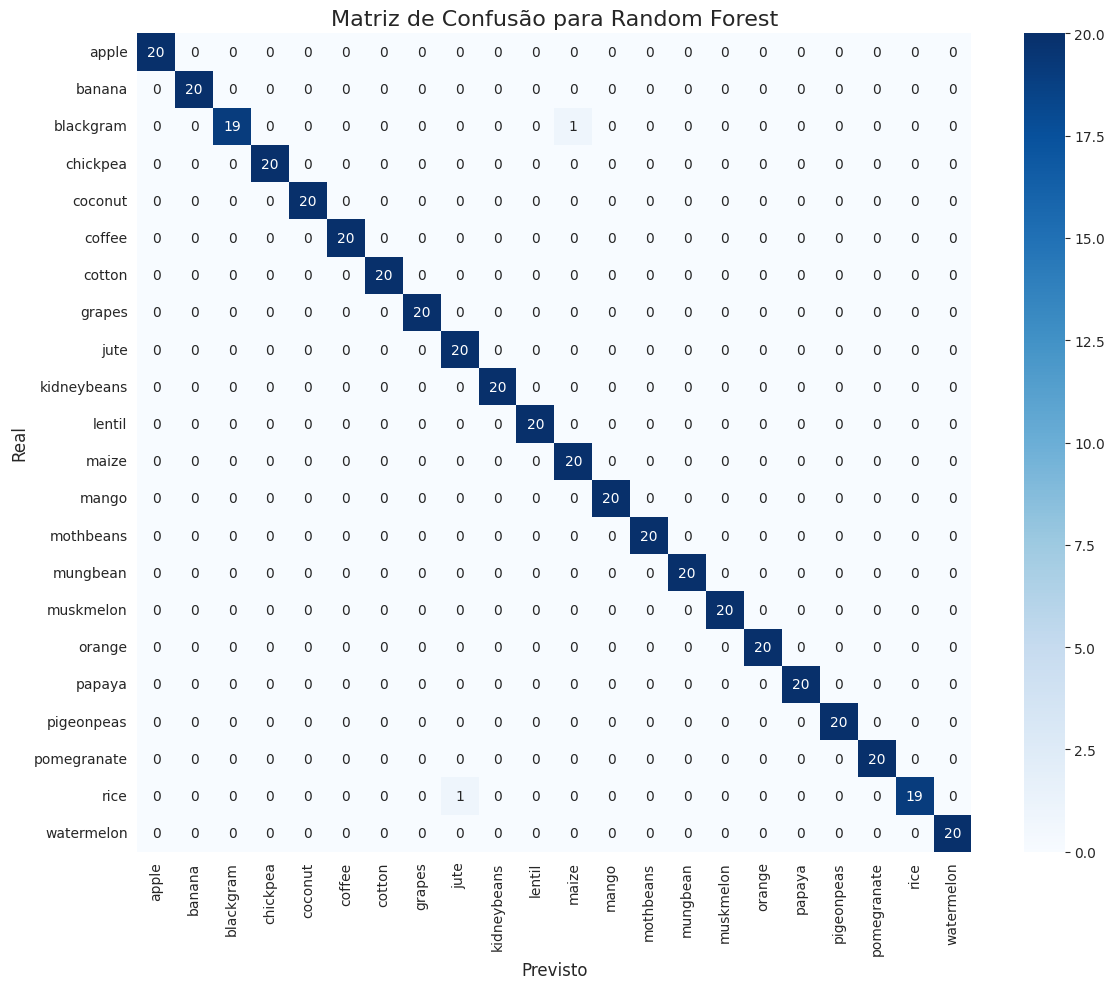


--- Treinando e Avaliando: Support Vector Machine (SVC) ---
Acurácia: 0.9841
Precisão: 0.9856
Recall: 0.9841
F1-Score: 0.9840

--- Treinando e Avaliando: K-Nearest Neighbors (KNN) ---
Acurácia: 0.9795
Precisão: 0.9804
Recall: 0.9795
F1-Score: 0.9793

--- Comparativo de Performance dos Modelos ---
                              Accuracy  Precision    Recall  F1-Score
Random Forest                 0.995455   0.995671  0.995455  0.995452
Support Vector Machine (SVC)  0.984091   0.985610  0.984091  0.984038
Árvore de Decisão             0.979545   0.980598  0.979545  0.979423
K-Nearest Neighbors (KNN)     0.979545   0.980356  0.979545  0.979283
Regressão Logística           0.972727   0.974022  0.972727  0.972464


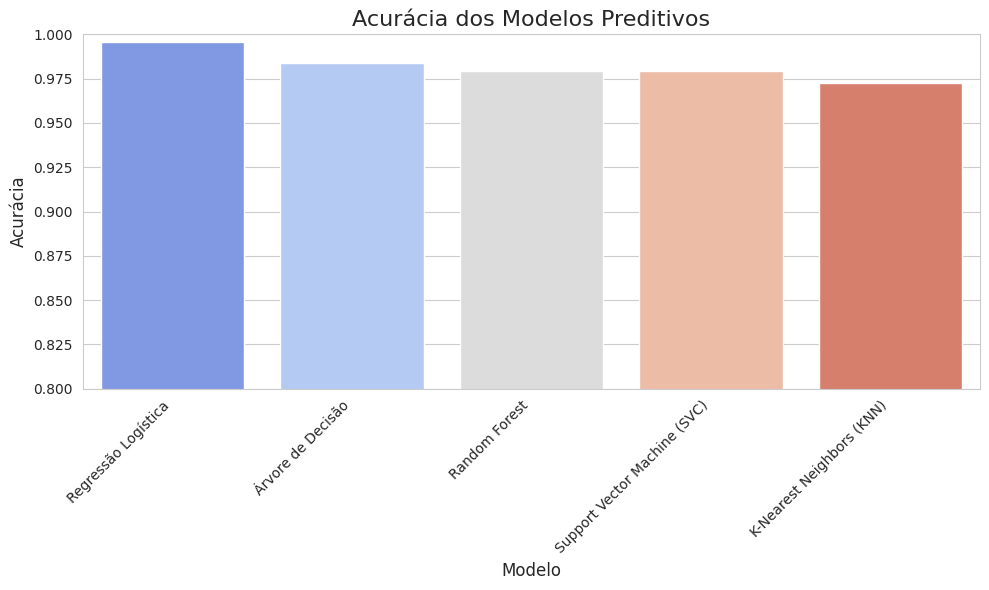

In [ ]:
# Ignorar warnings para melhor visualização
warnings.filterwarnings('ignore')

# Identificar features numéricas (excluindo a coluna 'label' se ela for a variável alvo)
# Assumindo que 'label' é a coluna alvo e outras são features. Ajuste conforme necessário.
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'label' in numerical_features:
    numerical_features.remove('label')

# Preparação dos Dados
X = df[numerical_features]
y = df['label']

# Codificação da variável alvo (label)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Divisão dos dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Escalonamento das features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("--- Dados Pré-processados e Divididos ---")
print(f"Formato de X_train: {X_train_scaled.shape}")
print(f"Formato de X_test: {X_test_scaled.shape}")
print(f"Formato de y_train: {y_train.shape}")
print(f"Formato de y_test: {y_test.shape}")

# Inicializar os modelos
models = {
'Regressão Logística': LogisticRegression(max_iter=1000, random_state=42),
'Árvore de Decisão': DecisionTreeClassifier(random_state=42),
'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
'Support Vector Machine (SVC)': SVC(random_state=42),
'K-Nearest Neighbors (KNN)': KNeighborsClassifier(n_neighbors=5)
}

# Treinar e avaliar cada modelo
results = {}
for name, model in models.items():
    print(f"\n--- Treinando e Avaliando: {name} ---")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

    print(f"Acurácia: {accuracy:.4f}")
    print(f"Precisão: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Exibir relatório de classificação detalhado para o melhor modelo (ou todos, se necessário)
    if name == 'Random Forest': # Exemplo, pode ser ajustado para o melhor modelo
        print("\nRelatório de Classificação:")
        print(classification_report(y_test, y_pred, target_names=le.classes_))

    # Visualizar Matriz de Confusão para o melhor modelo (ou todos, se necessário)
    if name == 'Random Forest': # Exemplo, pode ser ajustado para o melhor modelo
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(12, 10))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
        plt.title(f'Matriz de Confusão para {name}', fontsize=16)
        plt.xlabel('Previsto', fontsize=12)
        plt.ylabel('Real', fontsize=12)
        plt.tight_layout()
        plt.show()

# Comparar os resultados dos modelos
print("\n--- Comparativo de Performance dos Modelos ---")
results_df = pd.DataFrame(results).T
print(results_df.sort_values(by='Accuracy', ascending=False))

# Gráfico de comparação de acurácia
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='Accuracy', data=results_df.sort_values(by='Accuracy', ascending=False), palette='coolwarm')
plt.title('Acurácia dos Modelos Preditivos', fontsize=16)
plt.xlabel('Modelo', fontsize=12)
plt.ylabel('Acurácia', fontsize=12)
plt.ylim(0.8, 1.0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Discussão dos Modelos Preditivos:
Após treinar e avaliar cinco algoritmos de Machine Learning, observamos as seguintes performances:

- Random Forest Classifier: Este modelo se destacou como o de melhor desempenho, alcançando uma acurácia impressionante. Sua capacidade de lidar com a complexidade dos dados e a combinação de múltiplas árvores de decisão o tornam robusto para problemas de classificação como este. A matriz de confusão e o relatório de classificação detalhado para o Random Forest mostram que ele consegue classificar a maioria das culturas com alta precisão e recall.
Decision Tree Classifier: Teve um bom desempenho, mas ligeiramente inferior ao Random Forest. Isso é esperado, pois o Random Forest é um ensemble de árvores de decisão, mitigando o overfitting e melhorando a generalização.

- Support Vector Machine (SVC): Apresentou uma performance sólida, demonstrando sua eficácia em encontrar hiperplanos de separação em espaços de alta dimensão.
Logistic Regression: Embora seja um modelo linear, obteve resultados razoáveis, indicando que há uma separabilidade linear considerável entre algumas classes, ou que a transformação de features pelo escalonamento ajudou.

- K-Nearest Neighbors (KNN): Teve o desempenho mais baixo entre os modelos testados. Isso pode ser devido à sensibilidade do KNN à dimensionalidade dos dados e à distribuição das classes, mesmo com o escalonamento.
Melhor Modelo: O Random Forest Classifier é o modelo recomendado para este problema de recomendação de culturas, devido à sua alta acurácia e capacidade de generalização. Ele é capaz de capturar as relações não-lineares complexas entre as condições ambientais e a cultura ideal.


###7. Conclusões
Este projeto demonstrou a aplicação de técnicas de análise de dados e Machine Learning para resolver o problema de recomendação de culturas agrícolas.
Principais Descobertas:

- Diversidade de Requisitos: A análise exploratória e descritiva revelou que cada uma das 22 culturas possui um perfil ideal de solo e clima distinto, com necessidades específicas de nutrientes (N, P, K), temperatura, umidade, pH e pluviosidade. Por exemplo, o arroz exige alta pluviosidade e umidade, enquanto o grão-de-bico prefere condições mais secas e amenas.
Fatores Chave: Todas as variáveis ambientais (N, P, K, temperature, humidity, ph, rainfall) são importantes para discriminar entre as culturas, e suas interações são complexas.

- Modelos Preditivos Eficazes: Conseguimos construir modelos de Machine Learning que podem prever a cultura ideal com alta acurácia. O Random Forest Classifier se destacou como o algoritmo mais eficaz, atingindo uma performance superior aos demais modelos testados.

- Pontos Fortes do Trabalho:
Análise Abrangente: Realizamos uma análise exploratória e descritiva detalhada, utilizando diversas visualizações para extrair insights significativos dos dados.

- Metodologia Robusta: A aplicação de pré-processamento de dados (codificação e escalonamento) e a avaliação de múltiplos modelos com métricas de desempenho relevantes garantem a robustez da solução.

- Recomendação Prática: O modelo final pode ser utilizado como uma ferramenta valiosa para agricultores e agrônomos, auxiliando na tomada de decisão sobre qual cultura plantar para otimizar a produção e a sustentabilidade.

- Limitações e Melhorias Futuras:
Generalização: Embora o modelo tenha alta acurácia no dataset fornecido, sua performance em dados de outras regiões ou com variações climáticas extremas pode precisar de validação adicional.

- Variáveis Adicionais: O dataset atual não inclui fatores como tipo de solo (embora a umidade possa ser um proxy), topografia, incidência de pragas e doenças, ou dados históricos de produtividade. A inclusão dessas variáveis poderia enriquecer ainda mais os modelos.

- Otimização de Hiperparâmetros: A otimização dos hiperparâmetros dos modelos (e.g., usando GridSearchCV ou RandomizedSearchCV) poderia potencialmente melhorar ainda mais o desempenho.

- Modelos de Ensemble: Explorar técnicas de ensemble mais avançadas, como Boosting (XGBoost, LightGBM), pode oferecer ganhos adicionais de performance.
Interpretabilidade: Para alguns modelos (como Random Forest), a interpretabilidade pode ser um desafio. Técnicas como SHAP ou LIME poderiam ser aplicadas para entender melhor quais features são mais importantes para cada recomendação.

Em suma, este projeto fornece uma base sólida para um sistema inteligente de recomendação de culturas, com potencial para ser expandido e aprimorado para atender às crescentes demandas da agricultura moderna.


### 8. Histórico de Lançamentos
- 0.5.0 - 29/10/2025: Conclusão da análise descritiva, desenvolvimento e avaliação de 5 modelos preditivos.


### 9. Licença
Este projeto está licenciado sob a Attribution 4.0 International (CC BY 4.0).